In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import seaborn as sns

import pickle
from utils_ens import get_Xy_tt
from sklearn import metrics



In [2]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/rf_reg_hp_4f_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/rf_reg_hp_4f_df.pkl', 'rb')
rf_hp_df = pickle.load(pkl_file)
pkl_file.close()


In [3]:
# buttom five
rf_hp_df.sort_values('MSE')[:5]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,test_preds_con,test_preds_prob,MSE,MAE,AP,PR,ROC
42,123,10,6,70,mse,sqrt,"[3.4766131148159273e-07, 3.4766131148159273e-0...","[0.5000000869153278, 0.5000000869153278, 0.500...",0.015582,0.006881,0.208999,"([0.003059536074427898, 0.026511775938892427, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694997e-..."
26,140,10,14,148,mse,sqrt,"[2.478698959979165e-07, 2.478698959979165e-07,...","[0.500000061967474, 0.500000061967474, 0.50000...",0.015589,0.006882,0.212117,"([0.003059631595379332, 0.026510088473044365, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.60..."
19,139,10,2,88,mse,auto,"[2.8919259487499636e-07, 2.8919259487499636e-0...","[0.5000000722981487, 0.5000000722981487, 0.500...",0.015590,0.006862,0.211006,"([0.003059536074427898, 0.026511775938892427, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694997e-..."
38,130,10,9,67,mse,log2,"[2.385644035391439e-07, 2.385644035391439e-07,...","[0.5000000596411008, 0.5000000596411008, 0.500...",0.015600,0.006877,0.208631,"([0.003059536074427898, 0.027809847198641765, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694..."
9,103,10,9,105,mse,log2,"[3.3297429438021134e-07, 3.3297429438021134e-0...","[0.5000000832435736, 0.5000000832435736, 0.500...",0.015601,0.006859,0.211345,"([0.003059536074427898, 0.026510088473044365, ...","([0.0, 0.0, 0.0, 0.0, 2.609630580694997e-06, 2..."


In [4]:
# top five
rf_hp_df.sort_values('MSE', ascending= False)[:5]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,test_preds_con,test_preds_prob,MSE,MAE,AP,PR,ROC
10,121,5,11,11,mse,sqrt,"[2.1400482934962506e-05, 2.1400482934962506e-0...","[0.5000053501207335, 0.5000053501207335, 0.500...",0.015877,0.006890,0.194380,"([0.003059536074427898, 0.04452054794520548, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
35,104,6,11,14,mse,log2,"[7.293084295320665e-06, 7.293084295320665e-06,...","[0.5000018232710738, 0.5000018232710738, 0.500...",0.015863,0.006768,0.206071,"([0.003059536074427898, 0.02825170960834427, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
21,101,5,14,17,mse,auto,"[2.018694712278297e-05, 2.018694712278297e-05,...","[0.5000050467367806, 0.5000050467367806, 0.500...",0.015857,0.006860,0.196421,"([0.003059536074427898, 0.04452054794520548, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15,142,5,2,180,mse,sqrt,"[1.559664563578454e-05, 1.559664563578454e-05,...","[0.5000038991614089, 0.5000038991614089, 0.500...",0.015827,0.006839,0.199831,"([0.003059536074427898, 0.04452054794520548, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29,122,9,8,199,mse,sqrt,"[8.023977095688156e-07, 8.023977095688156e-07,...","[0.5000002005994274, 0.5000002005994274, 0.500...",0.015827,0.006866,0.212240,"([0.003059631595379332, 0.026510088473044365, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


0.2078806116243451


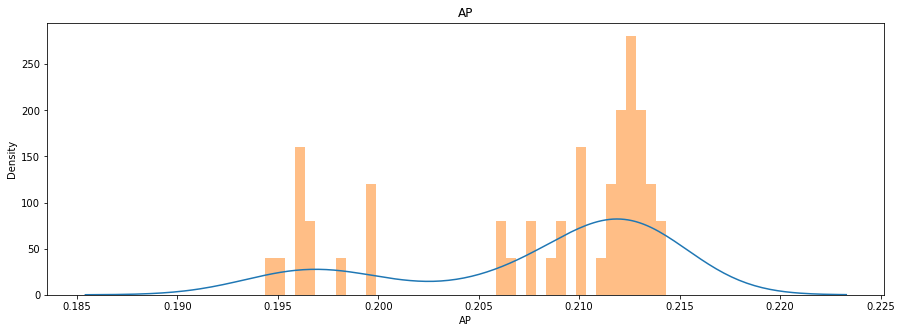

0.01570658284757807
/home/simon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


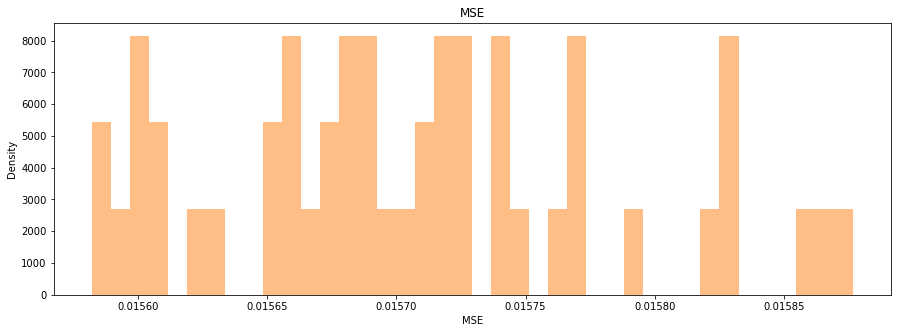

0.0067923503999873505
/home/simon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


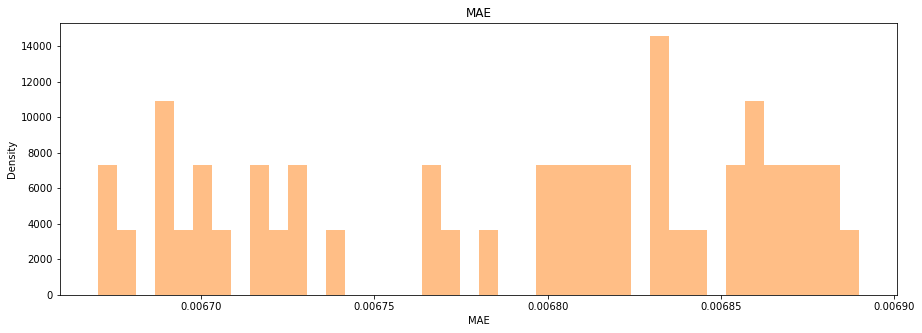

In [5]:
print(rf_hp_df['AP'].mean())
plt.figure(figsize = [15,5])
plt.title('AP')
plt.hist(rf_hp_df['AP'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['AP'])
plt.show()

print(rf_hp_df['MSE'].mean())
plt.figure(figsize = [15,5])
plt.title('MSE')
plt.hist(rf_hp_df['MSE'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['MSE'])
plt.show()

print(rf_hp_df['MAE'].mean())
plt.figure(figsize = [15,5])
plt.title('MAE')
plt.hist(rf_hp_df['MAE'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['MAE'])
plt.show()

In [6]:
rf_hp_df.columns

Index(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
       'criterion', 'max_features', 'test_preds_con', 'test_preds_prob', 'MSE',
       'MAE', 'AP', 'PR', 'ROC'],
      dtype='object')

n_estimators
max_depth
/home/simon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
min_samples_split
min_samples_leaf


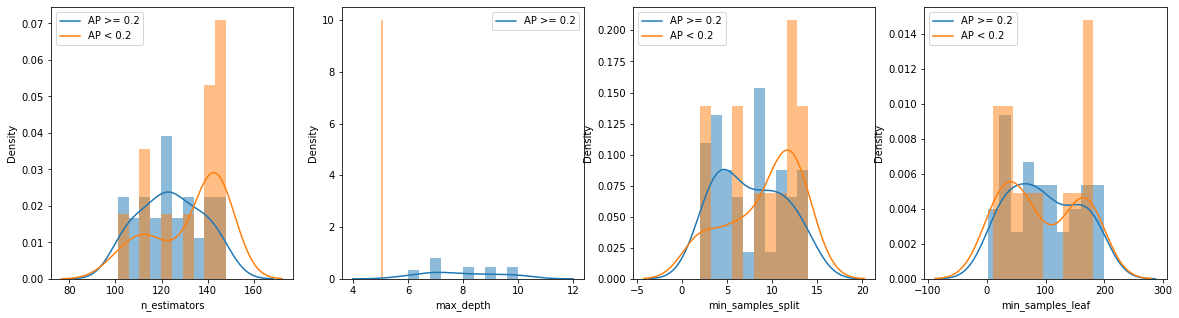

In [7]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.2

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['AP'] >= threshold][j], label = f'AP >= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['AP'] < threshold][j], label = f'AP < {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['AP'] >= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['AP'] < threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


n_estimators
max_depth
min_samples_split
min_samples_leaf


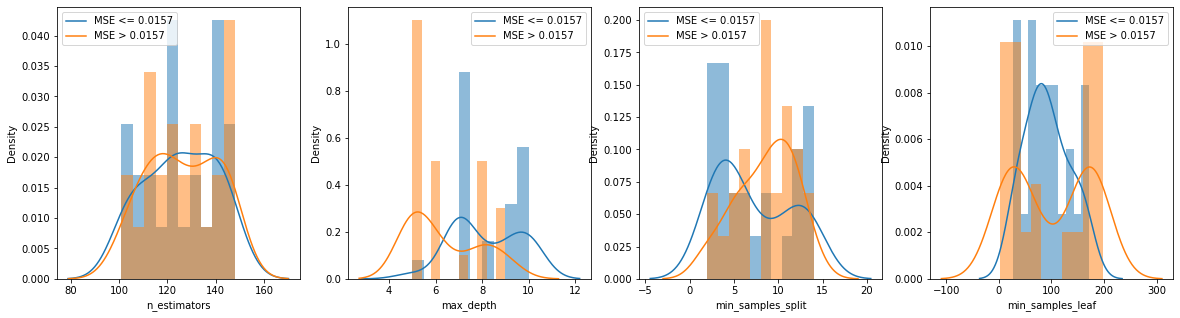

In [20]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.0157

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['MSE'] <= threshold][j], label = f'MSE <= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['MSE'] > threshold][j], label = f'MSE > {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['MSE'] <= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['MSE'] > threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


n_estimators
max_depth
min_samples_split
min_samples_leaf


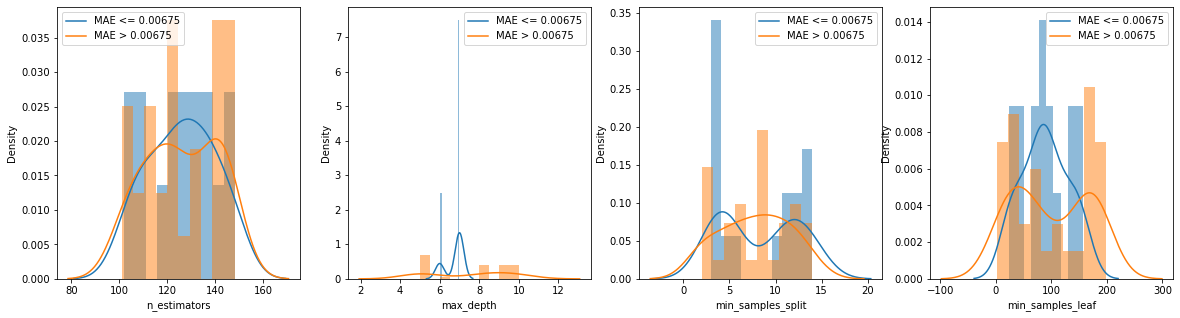

In [18]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.00675

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['MAE'] <= threshold][j], label = f'MAE <= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['MAE'] > threshold][j], label = f'MAE > {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['MAE'] <= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['MAE'] > threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


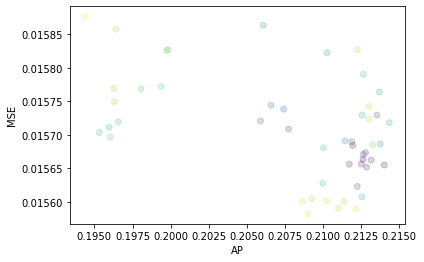

In [10]:
#I have looked at hte other parameters and there does not appear to be a relationship

plt.scatter(rf_hp_df['AP'], rf_hp_df['MSE'], c= rf_hp_df['MAE'], alpha = 0.2)
plt.xlabel('AP')
plt.ylabel('MSE')

#x_grid = np.arange(0.1,1.1,0.1)
#y_grid = x_grid * 0.52
#plt.plot(x_grid, y_grid)

plt.show()

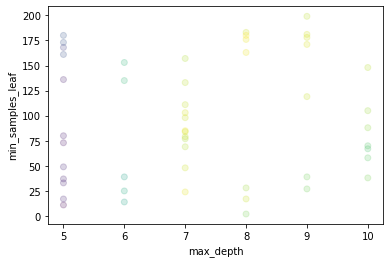

In [11]:

plt.scatter(rf_hp_df['max_depth'], rf_hp_df['min_samples_leaf'], c= rf_hp_df['AP'], alpha = 0.2)
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')

# x_grid = np.arange(0.1,1.1,0.1)
# y_grid = x_grid * 0.52
# plt.plot(x_grid, y_grid)

plt.show()

In [12]:
#Puhu so you need a undersampling ensample...

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)


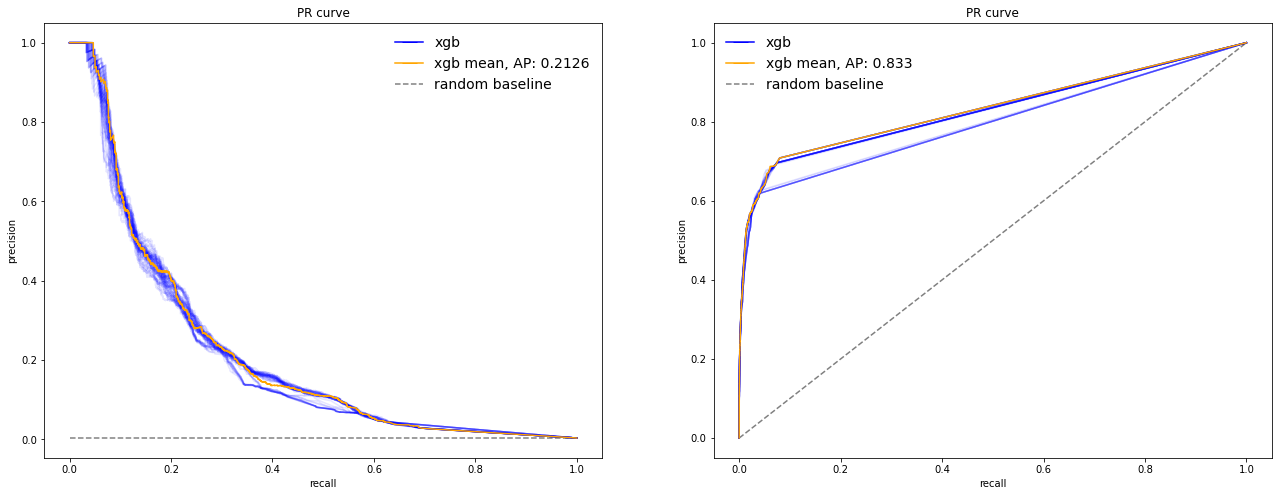

In [13]:
X_train, y_train, X_test, y_test = get_Xy_tt(local = True)

rf_pred_mean = np.array(rf_hp_df['test_preds_prob']).mean(axis = 0)
rf_pred_std = np.array(rf_hp_df['test_preds_prob']).std(axis = 0)

random_ap_base = (y_test>0).mean()
rf_mean_precision, rf_mean_recall, _ = metrics.precision_recall_curve(y_test, rf_pred_mean) 
rf_mean_AP = metrics.average_precision_score(y_test, rf_pred_mean)

rf_mean_fpr, rf_mean_tpr, _ =  metrics.roc_curve(y_test, rf_pred_mean) 
rf_mean_AUC = metrics.roc_auc_score(y_test, rf_pred_mean)

# -------------------------------------------------------------------------
# Fig
plt.figure(figsize = [22,8])

# ---------------------------------------------------------------------------
#PR/AP
plt.subplot(1,2,1)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.hlines(random_ap_base, 0, 1, linestyles='dashed', color = 'gray')

for i in rf_hp_df['PR']: 
    
    plt.plot(i[1], i[0], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_recall,rf_mean_precision, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AP:.4}')
random_ap_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_ap_line],frameon = False, fontsize = 14)


# ---------------------------------------------------------------------------
#ROC/AUC
plt.subplot(1,2,2)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

for i in rf_hp_df['ROC']: 
    
    plt.plot(i[0], i[1], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_fpr,rf_mean_tpr, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AUC:.4}')
random_auc_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_auc_line],frameon = False, fontsize = 14)

plt.show()


In [14]:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/preds_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/preds_df.pkl', 'rb')

df_merged = pickle.load(pkl_file)
pkl_file.close()

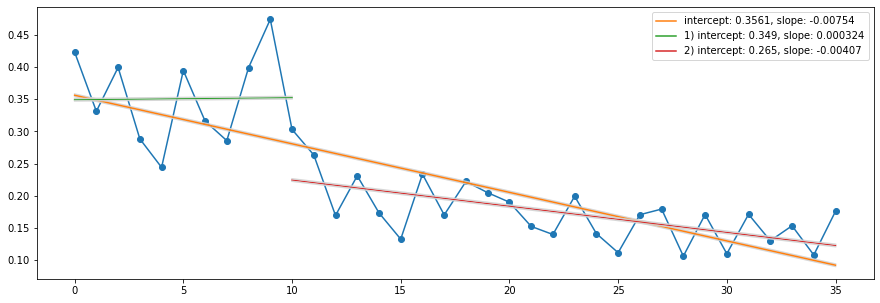

In [15]:
df_test = df_merged[df_merged['train'] == 0].copy()
df_test['pred_mean'] = rf_pred_mean
df_test['pred_std'] = rf_pred_std
df_test['y_binary'] = y_test

monthly_AP_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_AP = metrics.average_precision_score(monthly_subset['y_binary'], monthly_subset['pred_mean'])
    monthly_AP_list.append(monthly_AP)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_AP_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_AP_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_AP_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_AP_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

So this should be seen in tandem with the various lenght scales (from the test set).

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)
MSE: 0.0030918332772561707
MAE: 0.003758213661653233


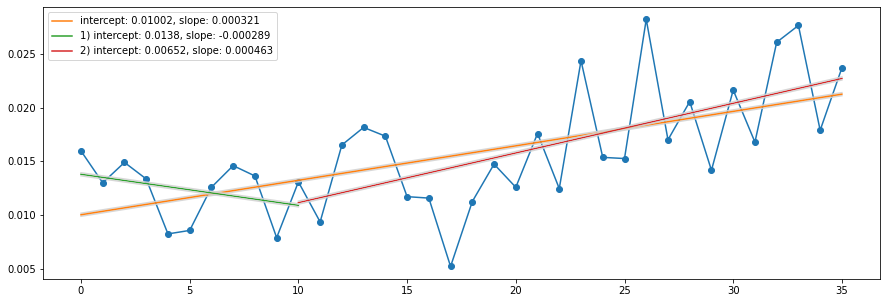

In [16]:
X_train_con, y_train_con, X_test_con, y_test_con = get_Xy_tt(local = True, binary_y= False)

rf_pred_con_mean = np.array(rf_hp_df['test_preds_con']).mean(axis = 0)
rf_pred_con_std = np.array(rf_hp_df['test_preds_con']).std(axis = 0)

rf_mean_MSE = metrics.mean_squared_error(y_test, rf_pred_con_mean)
rf_mean_MAE = metrics.mean_absolute_error(y_test, rf_pred_con_mean)
print(f'MSE: {rf_mean_MSE}')
print(f'MAE: {rf_mean_MAE}')


#df_test = df_merged[df_merged['train'] == 0].copy()
df_test['pred_con_mean'] = rf_pred_con_mean
df_test['pred_con_std'] = rf_pred_con_std
df_test['y_con'] = y_test_con

monthly_MSE_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_MSE = metrics.mean_squared_error(monthly_subset['y_con'], monthly_subset['pred_con_mean'])
    monthly_MSE_list.append(monthly_MSE)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_MSE_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_MSE_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_MSE_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_MSE_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

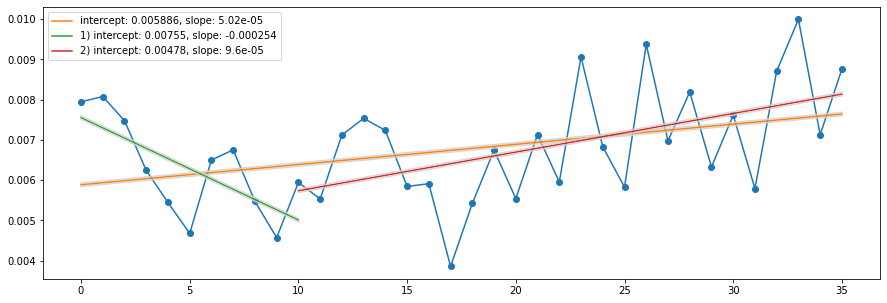

In [17]:

monthly_MAE_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_MAE = metrics.mean_absolute_error(monthly_subset['y_con'], monthly_subset['pred_con_mean'])
    monthly_MAE_list.append(monthly_MAE)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_MAE_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_MAE_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_MAE_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_MAE_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

In [ ]:
# so maybe chage max_depth to 6-7 and thats it.